In [2]:
import torch
print("Using device:", torch.device("cuda" if torch.cuda.is_available() else "cpu"))


Using device: cpu


In [3]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Path ke model
model_path = r"D:\fashion-object-detection\fashionyolovfinal\best(2).torchscript"

# Load model
model = YOLO(model_path)
print("Model berhasil dimuat!")


WARNING  Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Model berhasil dimuat!



0: 640x640 2 bagss, 2 shoess, 1 shorts, 1 watches, 96.6ms
Speed: 4.0ms preprocess, 96.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


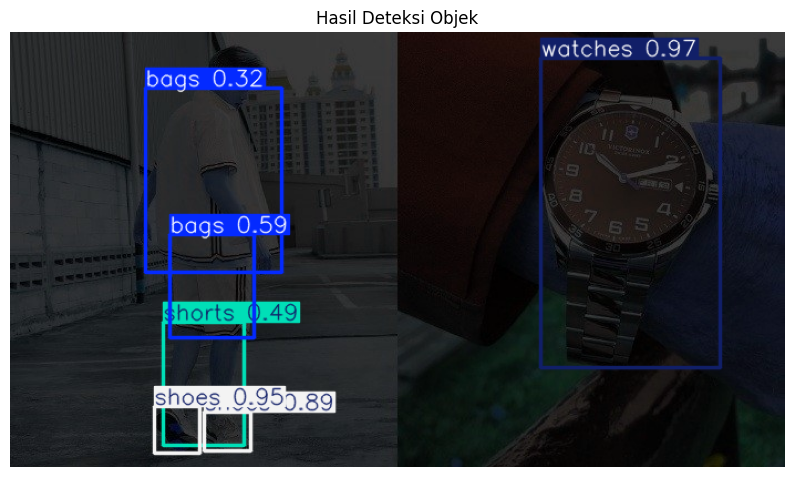

In [12]:
# Path ke gambar yang ingin dideteksi
image_path = r"D:\fashion-object-detection\fashionyolovfinal\fas.jpg"

# Baca gambar menggunakan OpenCV
gambar = cv2.imread(image_path)

# Konversi dari BGR ke RGB (karena OpenCV membaca gambar dalam format BGR)
gambar_rgb = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)

# Deteksi objek pada gambar
hasil = model.predict(gambar_rgb)

# Ambil informasi bounding box dan label
annotated_frame = hasil[0].plot()  # Gambar hasil deteksi dengan anotasi otomatis

# Tampilkan gambar hasil deteksi menggunakan matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Hasil Deteksi Objek")
plt.show()



0: 640x640 1 bags, 6 shirtss, 2 watchess, 374.4ms
Speed: 36.8ms preprocess, 374.4ms inference, 10.6ms postprocess per image at shape (1, 3, 640, 640)


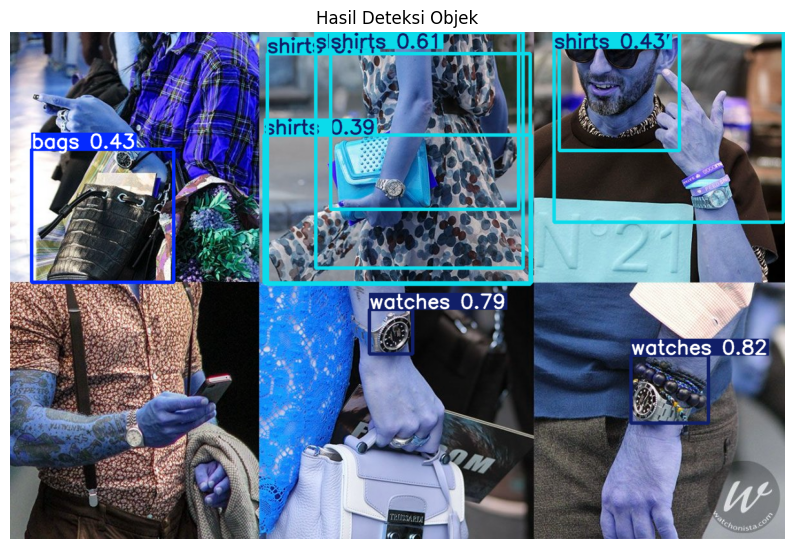

In [6]:
#  URL gambar yang ingin dideteksi
import urllib
import numpy as np


image_url = "https://www.watchonista.com/sites/default/files/watchographer/2914/articles/375276/body/rolex-milan-fashion-week-02.jpg"
# Membaca gambar dari URL
resp = urllib.request.urlopen(image_url)
gambar_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
gambar = cv2.imdecode(gambar_array, cv2.IMREAD_COLOR)

# Konversi dari BGR ke RGB (karena OpenCV membaca gambar dalam format BGR)
if gambar is not None:
	gambar_rgb = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)

	# Deteksi objek pada gambar
	hasil = model.predict(gambar_rgb)

	# Ambil informasi bounding box dan label
	annotated_frame = hasil[0].plot()  # Gambar hasil deteksi dengan anotasi otomatis

	# Tampilkan gambar hasil deteksi menggunakan matplotlib
	plt.figure(figsize=(10, 10))
	plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
	plt.axis("off")
	plt.title("Hasil Deteksi Objek")
	plt.show()
else:
	print("Gambar tidak dapat dibaca dari URL.")